In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# columns_long_list = ['url', 'text', 'tokens', 'level complexity']
# columns_short_list = ['url', 'text', 'tokens']
# df = pd.read_json('data/ground_true_plan_steps_new.json')
with open('../Evaluation/Preprocessing/pre-annotated.json') as f:
    data = json.load(f)

df =  pd.DataFrame.from_dict(data["study_subjects"]["research_software"])
# df.drop([0,3,10,12,13,18,19,26,28,33])
df


,id,name,url,plans,readme_instructions
0,1,AAAI-DISIM-UnivAQ/DALI,https://raw.githubusercontent.com/AAAI-DISIM-U...,"[{'type': 'Source', 'steps': [{'text': '1. To...",## Installation **OS X & Linux:** 1. To downlo...
1,2,BingqingCheng/cace,https://raw.githubusercontent.com/BingqingChen...,"[{'type': 'Source', 'steps': [{'text': 'Please...",## Installation \n Please refer to the `setup....
2,3,less-and-less-bugs/Trust_TELLER,https://raw.githubusercontent.com/less-and-les...,"[{'type': 'Source', 'steps': [{'text': 'Step 1...",## Getting Started Step 1: Download the datase...
3,4,utiasASRL/steam_icp,https://raw.githubusercontent.com/utiasASRL/st...,"[{'type': 'Container', 'steps': [{'text': 'Clo...",## Installation Clone this repository and its ...
4,5,PFischbeck/parameter-fitting-experiments,https://raw.githubusercontent.com/PFischbeck/p...,"[{'type': 'Source', 'steps': [{'text': '- Make...","# Installation - Make sure you have Python, Pi..."
5,6,gabbypinto/GET-Tok-Peru,https://raw.githubusercontent.com/gabbypinto/G...,"[{'type': 'Source', 'steps': [{'text': 'pip in...",## Installation pip install -r requirements.tx...
6,7,jonarriza96/gsft,https://raw.githubusercontent.com/jonarriza96/...,"[{'type': 'Source', 'steps': [{'text': '### De...",## Installation ### Dependencies Initialize gi...
7,8,EricssonResearch/Line-Based-Room-Segmentation-...,https://raw.githubusercontent.com/EricssonRese...,"[{'type': 'Source', 'steps': [{'text': 'The pr...",## Installation The project can be installed b...
8,9,viralInformatics/VIGA,https://raw.githubusercontent.com/viralInforma...,"[{'type': 'Source', 'steps': [{'text': 'Downlo...",## Installation ### Step1: Download VIGA Downl...
9,10,scimemia/NRN-EZ,https://raw.githubusercontent.com/scimemia/NRN...,"[{'type': 'Binary', 'steps': [{'text': 'Instal...","NRN-EZ was built with PyInstaller 3.6, and req..."


In [32]:
print(df.dtypes)

id                     object
name                   object
url                    object
plans                  object
readme_instructions    object
dtype: object


In [34]:
import json

# Load the JSON data
with open('../Evaluation/Preprocessing/pre-annotated.json') as f:
    data = json.load(f)

# print(data['study_subjects']["research_software"])

# Extract statistics
study_subjects = data['study_subjects']["research_software"]
total_subjects = 0
for subject in study_subjects:
    total_subjects = int(subject['id'])

print(f'Total subjects: {total_subjects}')

# Extract plan types
plan_types = []
for subject in study_subjects:
    for plan in subject['plans']:
        plan_types.append(plan['type'])

print(f'Plan types: {plan_types}')

# Extract readme instructions
readme_instructions = []
for subject in study_subjects:
    readme_instructions.append(subject['readme_instructions'])

print(f'Readme instructions: {readme_instructions}')

Total subjects: 33
Plan types: ['Source', 'Source', 'Source', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'Binary', 'Binary', 'Binary', 'Source', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'package manager', 'package manager', 'Binary', 'package manager', 'package manager', 'package manager', 'Source', 'package manager', 'package manager', 'Source', 'Source', 'package manager', 'package manager', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'package manager', 'Source', 'Source']
Readme instructions: ["## Installation **OS X & Linux:** 1. To download and install SICStus Prolog (it is needed), follow the instructions at https://sicstus.sics.se/download4.html. 2. Then, you can download DALI and test it by running an example DALI MAS: ```sh git clone https://github.com/AAAI-DISIM-UnivAQ/DALI.git cd DALI/Examples/advanced bash startmas.sh ``` &nbsp;&nbsp;&nbsp;&nbsp; You will see different windows opening

In [35]:
plan_types_and_steps = {}

for subject in study_subjects:
    plan_types_and_steps[subject['id']] = {}
    for plan in subject['plans']:
        plan_types_and_steps[subject['id']][plan['type']] = len(plan['steps'])

# Print the plan types and number of steps per type
for id, plan_types in plan_types_and_steps.items():
    print(f'For ID - {id}:')
    print('| Plan Type | Number of Steps |')
    print('|-----------|-----------------|')
    for plan_type, num_steps in plan_types.items():
        print(f'| {plan_type} | {num_steps} |')

For ID - 1:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 3 |
For ID - 2:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 3:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 2 |
For ID - 4:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Container | 3 |
For ID - 5:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 7 |
For ID - 6:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 7:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 3 |
For ID - 8:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 9:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 10 |
For ID - 10:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Binary | 1 |
For ID - 11:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source

In [36]:
# # Extract statistics
# study_subjects = data['study_subjects']

# # Create a dictionary to store the plan types and number of steps per type
# plan_types_and_steps = {}

# for subject in study_subjects:
#     plan_types_and_steps[subject['id']] = {}
#     for plan in subject['plans']:
#         plan_types_and_steps[subject['id']][plan['type']] = len(plan['steps'])

# Calculate the average number of steps for each plan type for each id
# plan_types_and_steps_averages = {}
# for id, plan_types in plan_types_and_steps.items():
    # plan_types_and_steps_averages[id] = {}
    # for plan_type, num_steps in plan_types_and_steps.items():
    #     plan_types_and_steps_averages[id][plan_type] = sum(int(num_steps)) / len(int(num_steps))

In [36]:
import json

def extract_attributes(data):
    extracted_data = []

    for subject in data.get("study_subjects", {}).get("research_software", []):
        subject_data = {"id": subject["id"],"name": subject["name"], "plans": [], "readme_instructions": subject["readme_instructions"]}

        for plan in subject.get("plans", []):
            plan_data = {
                "type": plan.get("type", ""),
                "steps": [{"text": step["text"], "note": step["note"], "seq_order": step["seq_order"], "is_optional": step["is_optional"], "commands": step["commands"]} for step in plan.get("steps", [])],
                "technology": plan.get("technology", [])
            }

            subject_data["plans"].append(plan_data)

        extracted_data.append(subject_data)

    return extracted_data

if __name__ == "__main__":
    # Assuming your JSON data is stored in a variable named 'json_data'
    json_data = '''
    ... (paste your JSON data here)
    '''

    try:
        with open('data/ground_true_plan_steps_new.json') as f:
            data = json.load(f)
        extracted_data = extract_attributes(data)

        # Write the extracted data to output.json
        with open('output.json', 'w', encoding='utf-8') as output_file:
            json.dump(extracted_data, output_file, ensure_ascii=False, indent=2)

        print("Extraction completed. Output written to output.json")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Extraction completed. Output written to output.json


In [38]:
import json
from tabulate import tabulate  # You may need to install the 'tabulate' library using 'pip install tabulate'

def calculate_statistics(extracted_data):
    statistics = []

    for subject_data in extracted_data:
        id_statistics = {"name": subject_data["name"], "type_counts": {}, "total_steps": 0, "average_steps_per_type": {}}

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")

            # Count occurrences of each plan type
            id_statistics["type_counts"][plan_type] = id_statistics["type_counts"].get(plan_type, 0) + 1

            # Count total number of steps
            id_statistics["total_steps"] += len(plan_data.get("steps", []))

        # Calculate average number of steps per type
        for plan_type, count in id_statistics["type_counts"].items():
            id_statistics["average_steps_per_type"][plan_type] = id_statistics["total_steps"] / count if count > 0 else 0

        statistics.append(id_statistics)

    return statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate statistics
        statistics = calculate_statistics(extracted_data)

        # Prepare data for tabulate
        table_data = []
        headers = ["ID", "Type Counts", "Total Steps", "Average Steps per Type"]

        for stat in statistics:
            row = [
                stat["name"],
                json.dumps(stat["type_counts"], indent=None),
                stat["total_steps"],
                json.dumps(stat["average_steps_per_type"], indent=None)
            ]
            table_data.append(row)
        
        # Print the tabular format
        print(tabulate(table_data, headers=headers, tablefmt="pretty"))

        # Output table_data to a CSV file
        import csv

        with open('table_data.csv', 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(headers)
            for row in table_data:
                csvwriter.writerow(row)

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


+-------------------------------------------------------+-------------------------------------+-------------+-----------------------------------------+
|                          ID                           |             Type Counts             | Total Steps |         Average Steps per Type          |
+-------------------------------------------------------+-------------------------------------+-------------+-----------------------------------------+
|                AAAI-DISIM-UnivAQ/DALI                 |            {"Source": 2}            |      5      |             {"Source": 2.5}             |
|                  BingqingCheng/cace                   |            {"Source": 1}            |      1      |             {"Source": 1.0}             |
|            less-and-less-bugs/Trust_TELLER            |            {"Source": 1}            |      2      |             {"Source": 2.0}             |
|                  utiasASRL/steam_icp                  |          {"Container": 1}     

In the following code, the function `calculate_readme_length` calculates the length of the readme_instructions for each id in the extracted data. The length is calculated as the number of **characters** in the readme_instructions string.

In [39]:
import json

def calculate_readme_length(extracted_data):
    readme_lengths = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        readme_instructions = subject_data.get("readme_instructions", "")

        # Calculate total length of the readme_instructions for each id
        readme_lengths[id_value] = len(readme_instructions)

    return readme_lengths

def calculate_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)
    
    # Calculate total length of readme_instructions
    total_readme_length = sum(readme_lengths.values())
    
    return total_readme_length

def calculate_average_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)

    # Calculate total average length of readme_instructions
    total_readme_length = sum(readme_lengths.values())
    total_average_readme_length = total_readme_length / len(readme_lengths) if len(readme_lengths) > 0 else 0

    return total_average_readme_length

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate total length of readme_instructions for each id
        readme_lengths = calculate_readme_length(extracted_data)

        # Print the total length of readme_instructions for each id
        print("Total length of 'readme_instructions' for each 'id':")
        for id_value, length in readme_lengths.items():
            print(f"ID: {id_value}, Total Length: {length}")

        # Calculate and print the total average length of readme_instructions
        total_average_readme_length = calculate_average_total_readme_length(extracted_data)
        print(f"\nTotal Average Length of 'readme_instructions' for all 'id': {total_average_readme_length:.2f}")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Total length of 'readme_instructions' for each 'id':
ID: 1, Total Length: 1324
ID: 2, Total Length: 84
ID: 3, Total Length: 518
ID: 4, Total Length: 776
ID: 5, Total Length: 798
ID: 6, Total Length: 280
ID: 7, Total Length: 513
ID: 8, Total Length: 139
ID: 9, Total Length: 1765
ID: 10, Total Length: 588
ID: 11, Total Length: 761
ID: 12, Total Length: 324
ID: 13, Total Length: 3937
ID: 14, Total Length: 652
ID: 15, Total Length: 411
ID: 16, Total Length: 276
ID: 17, Total Length: 1035
ID: 18, Total Length: 1861
ID: 19, Total Length: 1023
ID: 20, Total Length: 124
ID: 21, Total Length: 799
ID: 22, Total Length: 428
ID: 23, Total Length: 247
ID: 24, Total Length: 310
ID: 25, Total Length: 270
ID: 26, Total Length: 240
ID: 27, Total Length: 1194
ID: 28, Total Length: 145
ID: 29, Total Length: 375
ID: 30, Total Length: 316
ID: 31, Total Length: 464
ID: 32, Total Length: 790
ID: 33, Total Length: 153

Total Average Length of 'readme_instructions' for all 'id': 694.55


we calculate the length based on **tokens** (i.e., the number of words) by taking the length of the tokenized list

In [46]:
import json
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

def calculate_readme_length(extracted_data):
    readme_lengths = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        readme_instructions = subject_data.get("readme_instructions", "")

        # Tokenize the readme_instructions and calculate the length
        tokens = word_tokenize(readme_instructions)
        readme_lengths[id_value] = len(tokens)

    return readme_lengths

def calculate_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)
    
    # Calculate total length of readme_instructions (total tokens)
    total_readme_length = sum(readme_lengths.values())
    
    return total_readme_length

def calculate_average_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)

    # Calculate total average length of readme_instructions (average tokens)
    total_readme_length = sum(readme_lengths.values())
    total_average_readme_length = total_readme_length / len(readme_lengths) if len(readme_lengths) > 0 else 0

    return total_average_readme_length

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate total length of readme_instructions for each id (in tokens)
        readme_lengths = calculate_readme_length(extracted_data)

        # Print the total length of readme_instructions for each id (in tokens)
        print("Total length of 'readme_instructions' for each 'id' (in tokens):")
        for id_value, length in readme_lengths.items():
            print(f"ID: {id_value}, Total Length: {length}")

        # Calculate and print the total average length of readme_instructions (in tokens)
        total_average_readme_length = calculate_average_total_readme_length(extracted_data)
        print(f"\nTotal Average Length of 'readme_instructions' for all 'id' (in tokens): {total_average_readme_length:.2f}")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Total length of 'readme_instructions' for each 'id' (in tokens):
ID: 1, Total Length: 303
ID: 2, Total Length: 15
ID: 3, Total Length: 84
ID: 4, Total Length: 158
ID: 5, Total Length: 149
ID: 6, Total Length: 55
ID: 7, Total Length: 93
ID: 8, Total Length: 26
ID: 9, Total Length: 253
ID: 10, Total Length: 108
ID: 11, Total Length: 133
ID: 12, Total Length: 65
ID: 13, Total Length: 725
ID: 14, Total Length: 127
ID: 15, Total Length: 87
ID: 16, Total Length: 59
ID: 17, Total Length: 187
ID: 18, Total Length: 348
ID: 19, Total Length: 217
ID: 20, Total Length: 28
ID: 21, Total Length: 139
ID: 22, Total Length: 87
ID: 23, Total Length: 47
ID: 24, Total Length: 55
ID: 25, Total Length: 56
ID: 26, Total Length: 47
ID: 27, Total Length: 224
ID: 28, Total Length: 28
ID: 29, Total Length: 62
ID: 30, Total Length: 59
ID: 31, Total Length: 102
ID: 32, Total Length: 160
ID: 33, Total Length: 30

Total Average Length of 'readme_instructions' for all 'id' (in tokens): 130.79


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ccugutrillague/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ccugutrillague/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


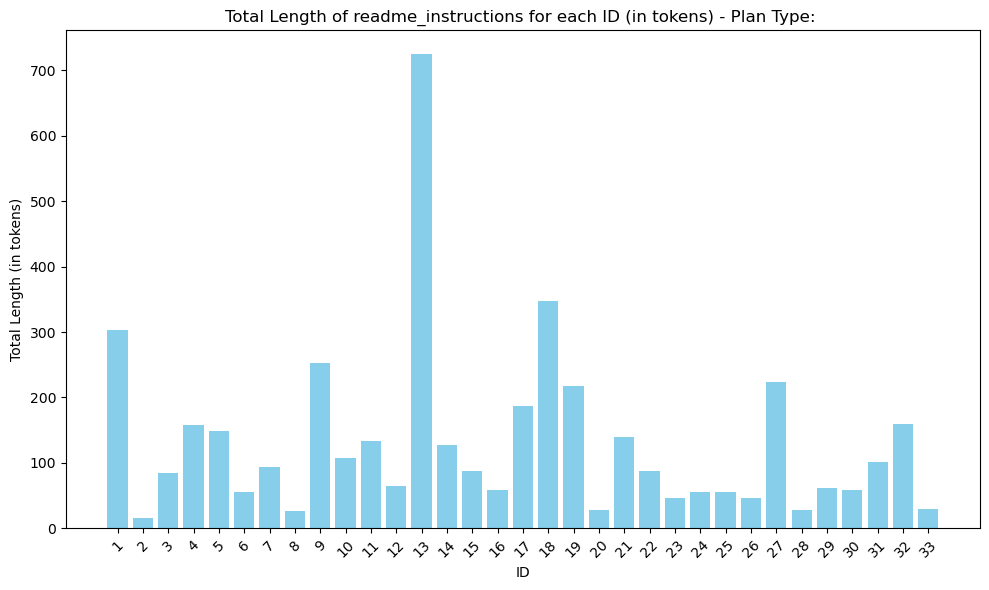

In [47]:
import json
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

def calculate_readme_length(extracted_data):
    readme_lengths = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        plan_type = subject_data.get("type", "")
        readme_instructions = subject_data.get("readme_instructions", "")

        # Tokenize the readme_instructions and calculate the length
        tokens = word_tokenize(readme_instructions)
        readme_lengths.setdefault(plan_type, {}).setdefault(id_value, 0)
        readme_lengths[plan_type][id_value] = len(tokens)

    return readme_lengths

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate total length of readme_instructions for each id (in tokens) grouped by plan types
        readme_lengths_by_plan = calculate_readme_length(extracted_data)

        # Plot the bar chart for each plan type
        for plan_type, readme_lengths in readme_lengths_by_plan.items():
            plt.figure(figsize=(10, 6))
            plt.bar(readme_lengths.keys(), readme_lengths.values(), color='skyblue')
            plt.xlabel('ID')
            plt.ylabel('Total Length (in tokens)')
            plt.title(f'Total Length of readme_instructions for each ID (in tokens) - Plan Type: {plan_type}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


In [40]:
import json

def calculate_group_statistics(extracted_data):
    group_statistics = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        types_and_technologies = []

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")
            technologies = plan_data.get("technology", [])

            # Create a unique key for the group based on types and technologies
            group_key = (tuple(sorted(set([plan_type]))), tuple(sorted(set(technologies))))

            # Update the count for the group
            group_statistics.setdefault(group_key, {"count": 0, "ids": []})
            group_statistics[group_key]["count"] += 1
            group_statistics[group_key]["ids"].append(id_value)

    return group_statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate group statistics
        group_statistics = calculate_group_statistics(extracted_data)

        # Print the group statistics
        print("Group of IDs with unique counts for each unique type and technology:")
        for group_key, stats in group_statistics.items():
            type_str = ', '.join(group_key[0])
            tech_str = ', '.join(group_key[1])
            count = stats["count"]
            ids = ', '.join(map(str, stats["ids"]))
            print(f"Group: Types({type_str}), Technologies({tech_str}), Count: {count}, IDs: {ids}")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Group of IDs with unique counts for each unique type and technology:
Group: Types(Source), Technologies(Linux), Count: 3, IDs: 1, 13, 32
Group: Types(Source), Technologies(Windows), Count: 1, IDs: 1
Group: Types(Source), Technologies(), Count: 22, IDs: 2, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 19, 21, 22, 24, 26, 27, 28, 29, 30, 33
Group: Types(Container), Technologies(Docker), Count: 3, IDs: 4, 13, 25
Group: Types(Binary), Technologies(Linux), Count: 1, IDs: 10
Group: Types(Binary), Technologies(Mac), Count: 1, IDs: 10
Group: Types(Binary), Technologies(Windows), Count: 1, IDs: 10
Group: Types(Source), Technologies(Mac), Count: 1, IDs: 13
Group: Types(package manager), Technologies(Linux, Windows), Count: 1, IDs: 17
Group: Types(package manager), Technologies(Mac), Count: 1, IDs: 17
Group: Types(Binary), Technologies(), Count: 1, IDs: 17
Group: Types(package manager), Technologies(pip), Count: 4, IDs: 18, 19, 20, 23
Group: Types(package manager), Technologies(conda), Count: 2, IDs: 18,

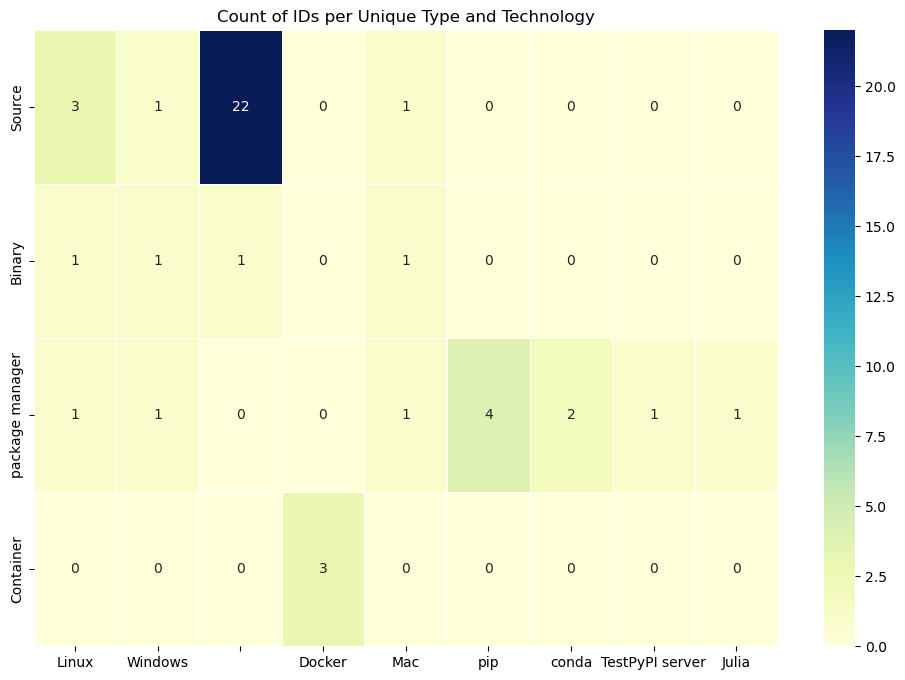

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_technology_type_statistics(extracted_data):
    technology_type_statistics = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")
            technologies = plan_data.get("technology", [])

            for tech in technologies:
                # Update the count for each combination of type and technology
                technology_type_statistics.setdefault(tech, {}).setdefault(plan_type, 0)
                technology_type_statistics[tech][plan_type] += 1

    return technology_type_statistics

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap="YlGnBu", fmt='d', linewidths=.5)
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate technology type statistics
        tech_type_statistics = calculate_technology_type_statistics(extracted_data)

        # Create a DataFrame for better plotting
        df = pd.DataFrame(tech_type_statistics).fillna(0).astype(int)

        # Plot the heatmap
        plot_heatmap(df, "Count of IDs per Unique Type and Technology")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


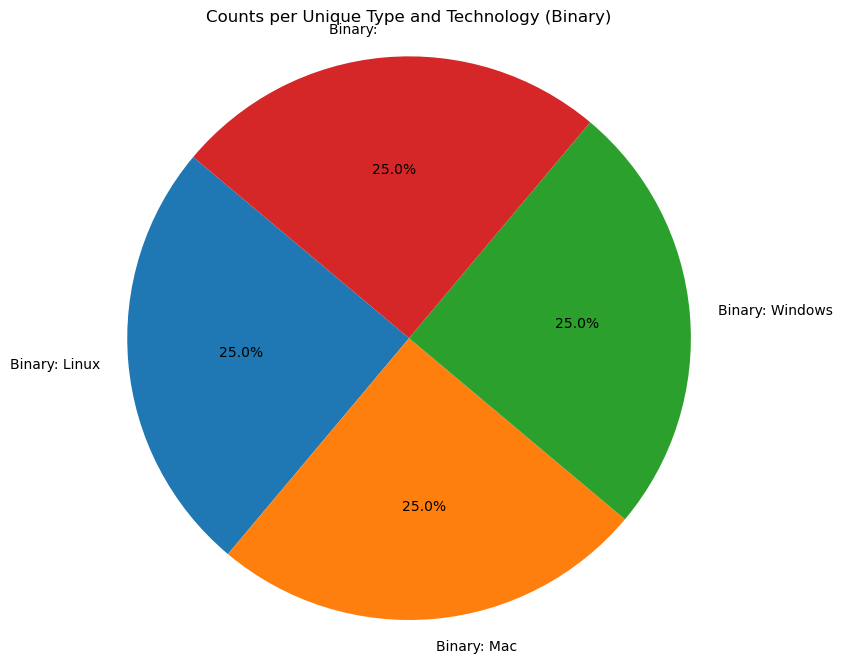

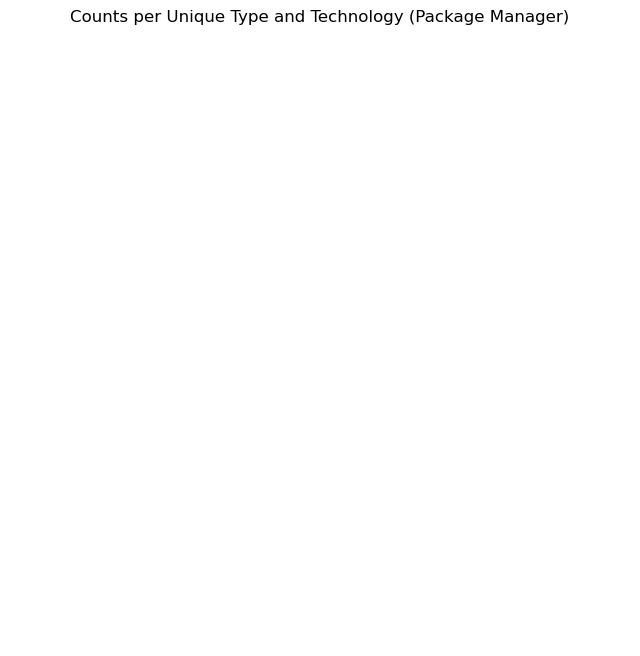

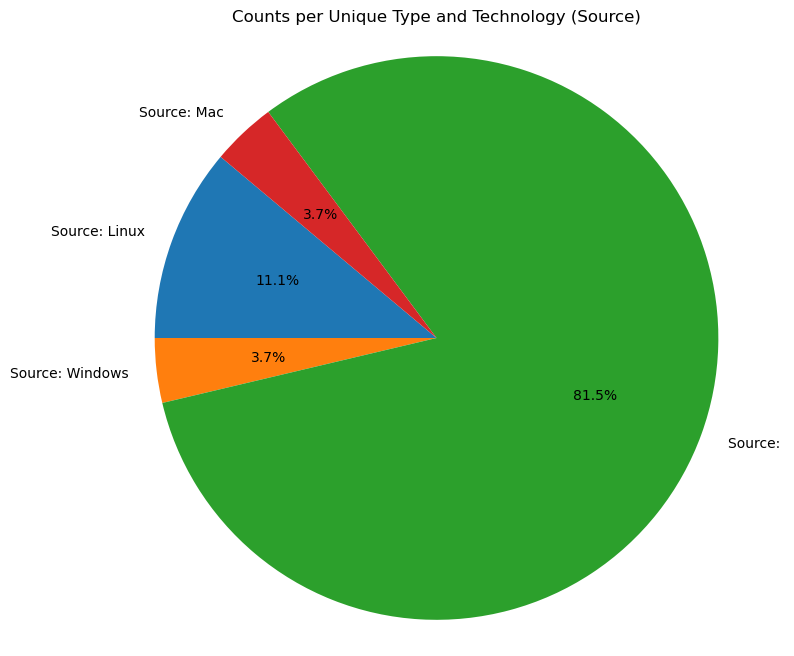

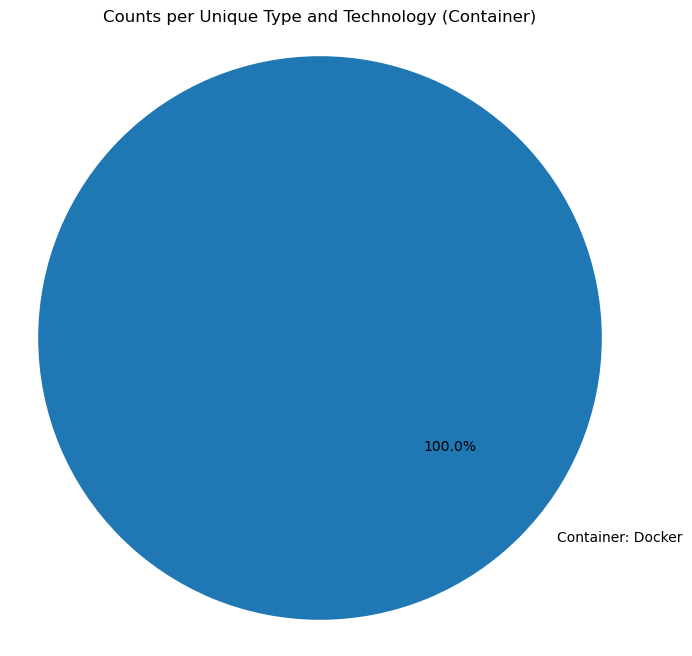

In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def calculate_technology_type_statistics(extracted_data):
    technology_type_statistics = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")
            technologies = plan_data.get("technology", [])

            for tech in technologies:
                # Update the count for each combination of type and technology
                technology_type_statistics.setdefault((plan_type, tech), 0)
                technology_type_statistics[(plan_type, tech)] += 1

    return technology_type_statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate technology type statistics
        tech_type_statistics = calculate_technology_type_statistics(extracted_data)

        # Create a separate DataFrame for each plan type
        for plan_type in ["Binary", "Package Manager", "Source", "Container"]:
            # Filter the data for the current plan type
            filtered_data = {key: value for key, value in tech_type_statistics.items() if key[0] == plan_type}

            # Extract counts and labels for the pie chart
            labels = [f"{type}: {tech}" for type, tech in filtered_data.keys()]
            counts = filtered_data.values()

            # Plot the pie chart
            plt.figure(figsize=(8, 8))
            plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.title(f"Counts per Unique Type and Technology ({plan_type})")
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.show()

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


In [21]:
import json
import pandas as pd

def calculate_plan_type_statistics(extracted_data):
    plan_type_statistics = {plan_type: {"total_steps": 0, "total_optional_steps": 0, "total_notes_length": 0, "total_commands_length": 0, "unique_technologies": set()}
                            for plan_type in ["Container", "Binary", "Source", "package manager"]}

    for subject_data in extracted_data:
        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")

            # Skip processing if the plan type is not one of the expected values
            if plan_type not in plan_type_statistics:
                continue

            steps = plan_data.get("steps", [])
            technologies = plan_data.get("technology", [])

            total_steps = len(steps)
            total_optional_steps = sum(1 for step in steps if step.get("is_optional", False))
            total_notes_length = sum(len(step.get("note", "")) for step in steps)
            total_commands_length = sum(len(step.get("commands", "")) for step in steps)

            # Update the statistics for each plan type
            plan_type_statistics[plan_type]["total_steps"] += total_steps
            plan_type_statistics[plan_type]["total_optional_steps"] += total_optional_steps
            plan_type_statistics[plan_type]["total_notes_length"] += total_notes_length
            plan_type_statistics[plan_type]["total_commands_length"] += total_commands_length
            plan_type_statistics[plan_type]["unique_technologies"].update(technologies)

    return plan_type_statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate plan type statistics
        plan_type_statistics = calculate_plan_type_statistics(extracted_data)

        # Create DataFrames for better tabular output
        df_list = []

        for plan_type, stats in plan_type_statistics.items():
            df_list.append([plan_type, stats["total_steps"], stats["total_optional_steps"],
                            stats["total_notes_length"], stats["total_commands_length"],
                            ", ".join(stats["unique_technologies"])])

        columns = ["Plan Type", "Total Steps", "Total Optional Steps", "Total Notes Length", "Total Commands Length", "Unique Technologies"]
        df = pd.DataFrame(df_list, columns=columns)

        # Print the tabular format for each plan type
        for plan_type, stats in plan_type_statistics.items():
            filtered_df = df[df["Plan Type"] == plan_type]
            print(f"\nStatistics for Plan Type: {plan_type}\n")
            print(filtered_df)

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")



Statistics for Plan Type: Container

   Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
0  Container            9                     1                 851   

   Total Commands Length Unique Technologies  
0                    614              Docker  

Statistics for Plan Type: Binary

  Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
1    Binary            4                     0                   0   

   Total Commands Length    Unique Technologies  
1                      0  , Mac, Linux, Windows  

Statistics for Plan Type: Source

  Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
2    Source           81                     9                2913   

   Total Commands Length    Unique Technologies  
2                   4745  , Mac, Linux, Windows  

Statistics for Plan Type: package manager

         Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
3  package manager           18                     